In [1]:
pip install pytorch-model-summary

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchsampler

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Resize, RandomHorizontalFlip, Grayscale
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from pytorch_model_summary import summary
from helpers import *

In [2]:
# pip install torchsampler
from torchsampler import ImbalancedDatasetSampler

In [52]:
torch.manual_seed(42)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
size = 32
batch_size = 128
transformation = Compose([RandomHorizontalFlip(), Grayscale(), Resize((size, size)), ToTensor()])

In [4]:
root = 'chest_xray/train'
train_data = create_dataset(root, transformation)
train_loader = produce_loader(train_data, batch_size, shuffle=True)

In [5]:
root = 'chest_xray/test'
test_data = create_dataset(root, transformation)
test_loader = produce_loader(test_data, batch_size)

In [6]:
root = 'chest_xray/val'
val_data = create_dataset(root, transformation)
val_loader = produce_loader(val_data, batch_size)

[3119, 110, 5087, 4190, 4784, 3095, 3941, 3304, 5780]


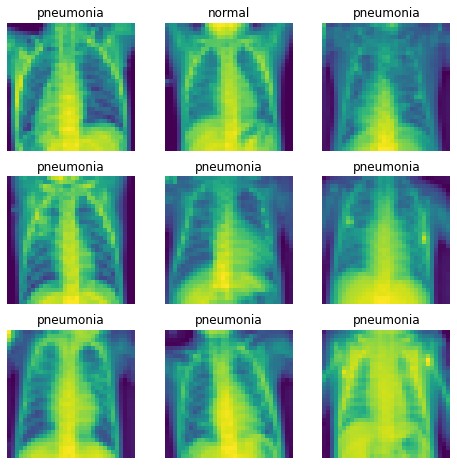

In [7]:
visualize_data(train_data)

[393, 327, 48, 112, 451, 547, 220, 314, 513]


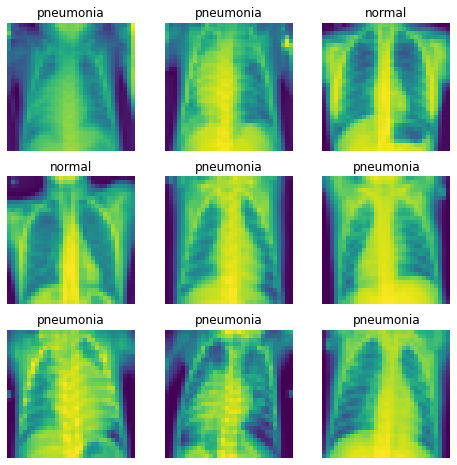

In [8]:
visualize_data(test_data)

In [11]:
resnet = models.resnet34(pretrained=True).to(device)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
resnet.conv1 = torch.nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)

In [13]:
for param in resnet.parameters():
    param.requiresGrad = False
resnet.conv1.requiresGrad = True

In [14]:
resnet.fc = torch.nn.Sequential(resnet.fc, torch.nn.Linear(1000, 2))
print(resnet)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
def create_adam_optimizer(model, lr = 0.1, betas=(0.9, 0.999), amsgrad=False,weight_decay=1e-5):
    return optim.Adam(model.parameters(), lr = lr, amsgrad=amsgrad, betas=betas)

In [21]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
optimizer = create_adam_optimizer(resnet, lr = 0.001)
epochs=20

tl, ta, vl, va = train(device, resnet.to(device),
                       train_loader, val_loader, 
                       optimizer, epochs = 20)
train_losses+=tl
train_accuracies+=ta
val_losses+=vl
val_accuracies+=va

Epoch 1/20, Batch number: 0, Cumulated accuracy: 0.53125
Epoch 1/20, Batch number: 5, Cumulated accuracy: 0.6927083333333334
Epoch 1/20, Batch number: 10, Cumulated accuracy: 0.7727272727272727
Epoch 1/20, Batch number: 15, Cumulated accuracy: 0.8154296875
Epoch 1/20, Batch number: 20, Cumulated accuracy: 0.8418898809523809
Epoch 1/20, Batch number: 25, Cumulated accuracy: 0.8596754807692307
Epoch 1/20, Batch number: 30, Cumulated accuracy: 0.8722278225806451
Epoch 1/20, Batch number: 35, Cumulated accuracy: 0.8836805555555556
Epoch 1/20, Batch number: 40, Cumulated accuracy: 0.8902439024390244
Epoch 1/20, Batch number: 45, Cumulated accuracy: 0.8974184782608695
--- Epoch 1/20: Train loss: 0.3151, Train accuracy: 0.8977
--- Epoch 1/20: Val loss: 0.3070, Val accuracy: 0.8718
Epoch 2/20, Batch number: 0, Cumulated accuracy: 0.9375
Epoch 2/20, Batch number: 5, Cumulated accuracy: 0.9440104166666666
Epoch 2/20, Batch number: 10, Cumulated accuracy: 0.9446022727272727
Epoch 2/20, Batch numb

In [ ]:
torch.save({'model_state_dict': resnetl.state_dict(), 
            'optimizer_state_dict': optimizer.state_dict()}, 
           './resnet')



In [73]:
resnet.load_state_dict(torch.load("./resnet")["model_state_dict"])

<All keys matched successfully>

Test loss: 0.2711, Test accuracy: 0.9214
Precision: 0.9223946784922394
Recall: 0.9742388758782201
F1 score: 0.9476082004555809


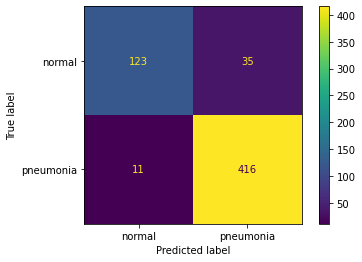

In [75]:
true_labels, model_preds, test_loss, test_accuracy = test(device, resnet.to(device), test_loader, get_predictions=True)
show_metrics(true_labels, model_preds)